### Exploratory Data Analysis

In this step I will do some basic statistics and structure of the dataset.

In [57]:
# Preparation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [58]:
# Load dataset
df = pd.read_csv('random_stock_market_dataset.csv')
# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-01-01,296.45,307.31,293.96,303.72,93133
1,2024-01-02,190.11,193.10,187.21,191.40,64993
2,2024-01-03,197.41,208.64,193.37,205.89,70326
3,2024-01-04,253.13,262.67,248.67,258.95,17358
4,2024-01-05,241.35,253.09,238.99,252.20,20847


As we can see, the dataset contains 6 columns, a date column and others are OHLCV data of the stock.
Now we will understand more by printing the information of each column.

In [59]:
# Display columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60 non-null     object 
 1   Open    60 non-null     float64
 2   High    60 non-null     float64
 3   Low     60 non-null     float64
 4   Close   60 non-null     float64
 5   Volume  60 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


This dataset contains the 60-day data of the stock price. 
There's no null value in the dataset, so I don't need to deal with missing values.
However, the dtype of Date column is object, so we need to convert it to datetime in Python.

In [60]:
# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

In [61]:
# Basic statistics
df.describe()

,Open,High,Low,Close,Volume
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,310.552000,322.589833,308.056833,320.412667,95405.516667
std,108.859051,109.095813,108.986426,109.157159,54895.342146
min,112.680000,123.780000,109.430000,121.270000,13193.000000
25%,222.957500,238.247500,220.042500,237.242500,48016.500000
50%,303.240000,313.800000,302.385000,309.385000,93850.500000
75%,396.150000,415.915000,392.905000,413.462500,130917.250000
max,492.790000,501.670000,492.300000,500.420000,195189.000000


Now we ascend to the exploratory and visualization part.

<Axes: title={'center': 'Close Price Over Time'}, xlabel='Date'>

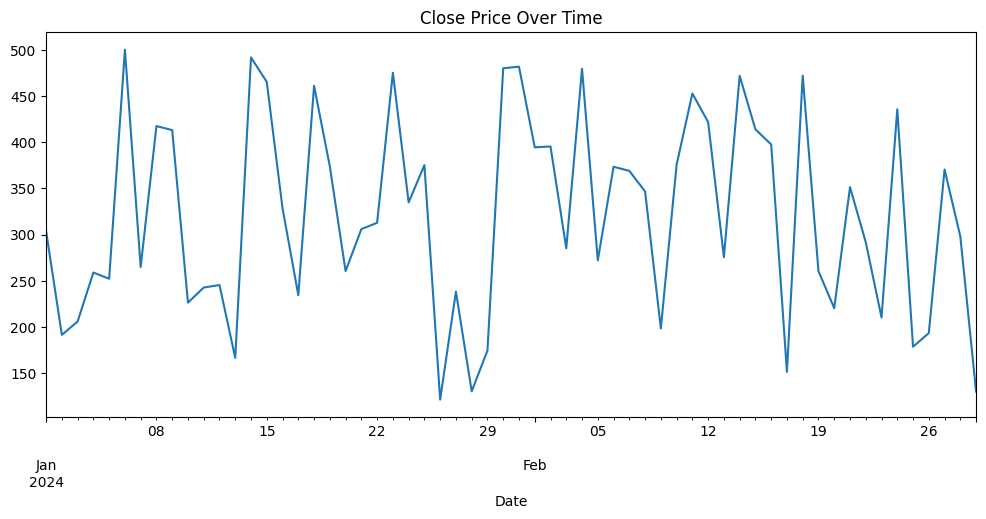

In [62]:
# Plot close price over time
df['Close'].plot(figsize=(12,5), title="Close Price Over Time")

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

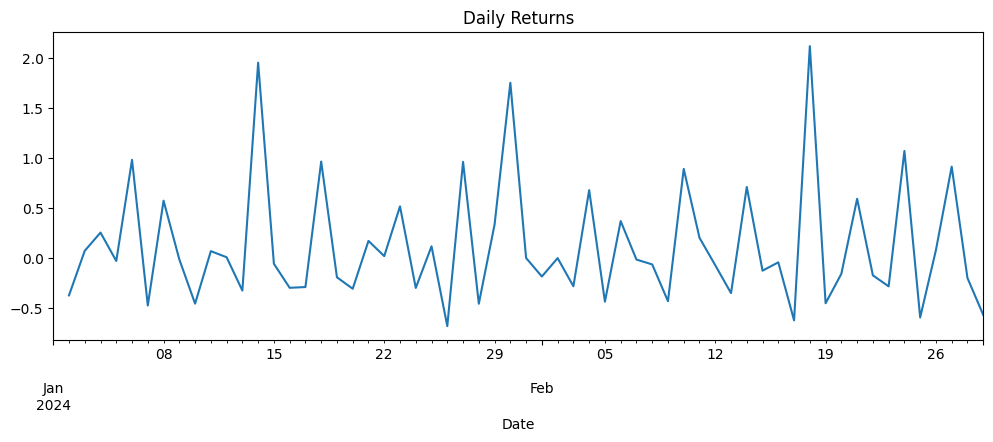

In [63]:
# Calculate and plot daily returns
df['Return'] = df['Close'].pct_change()
df['Return'].plot(figsize=(12,4), title="Daily Returns")

,Close,Volume(k)
Close,1.000000,-0.138425
Volume(k),-0.138425,1.000000


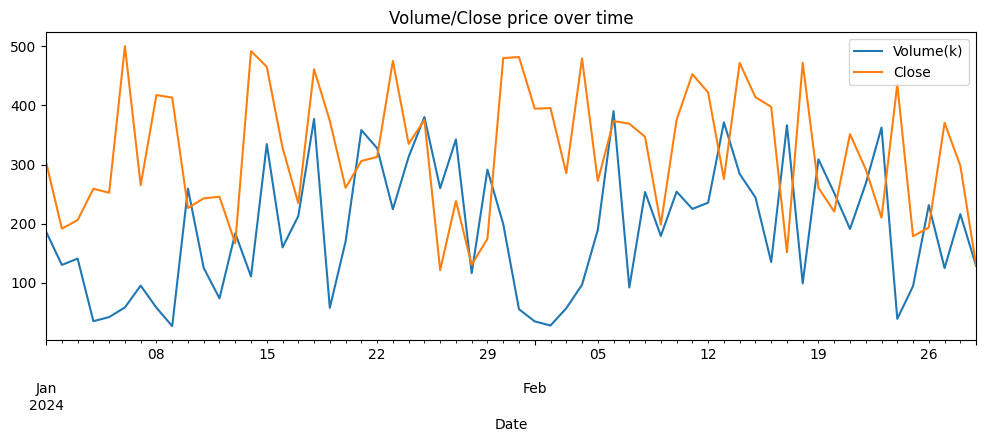

In [64]:
df['Volume(k)'] = df['Volume'] / 500
df[['Volume(k)', 'Close']].plot(figsize=(12,4), title="Volume/Close price over time")
df[['Close', 'Volume(k)']].corr()

In [65]:
# Correlation matrix between columns
df[['Open','High','Low','Close','Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999174,0.999920,0.999174,-0.133607
High,0.999174,1.000000,0.999066,0.999912,-0.136512
Low,0.999920,0.999066,1.000000,0.999075,-0.129752
Close,0.999174,0.999912,0.999075,1.000000,-0.138425
Volume,-0.133607,-0.136512,-0.129752,-0.138425,1.000000


<Axes: title={'center': 'Close with Moving Averages'}, xlabel='Date'>

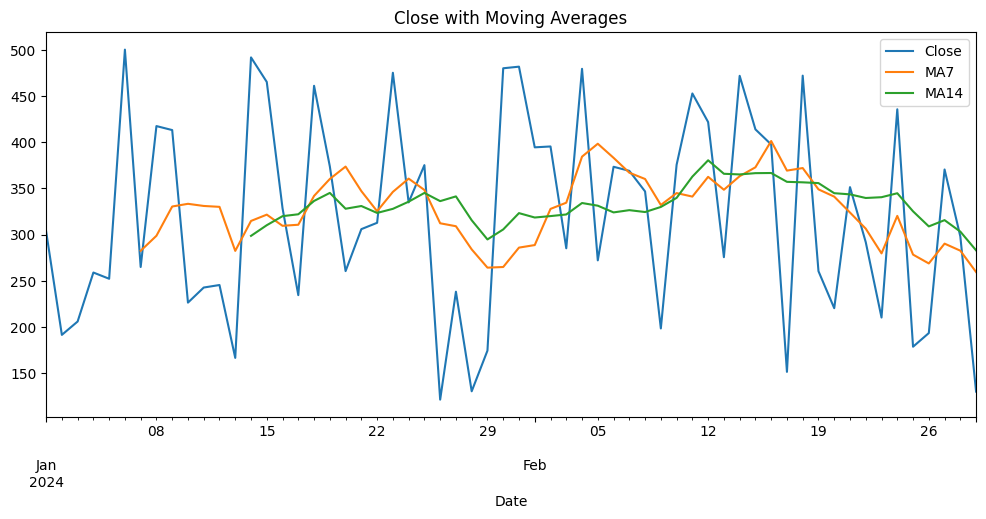

In [66]:
# Moving averages
df['MA7'] = df['Close'].rolling(7).mean()
df['MA14'] = df['Close'].rolling(14).mean()

df[['Close','MA7','MA14']].plot(figsize=(12,5), title="Close with Moving Averages")
